# Spatial transcriptomics application from MEFISTO paper

https://github.com/bioFAM/MEFISTO_tutorials/blob/master/MEFISTO_ST.ipynb

In [6]:
%load_ext autoreload
%autoreload 2

import warnings

import scanpy as sc
from data_loader import load_mefisto_visium

from famo.core import CORE
from famo.plotting import (
    plot_factor_correlation,
    plot_factors_covariate_2d,
    plot_smoothness,
    plot_top_weights,
    plot_training_curve,
    plot_variance_explained,
)

warnings.simplefilter(action="ignore", category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
adata = load_mefisto_visium()

/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:275: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number
/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitMo

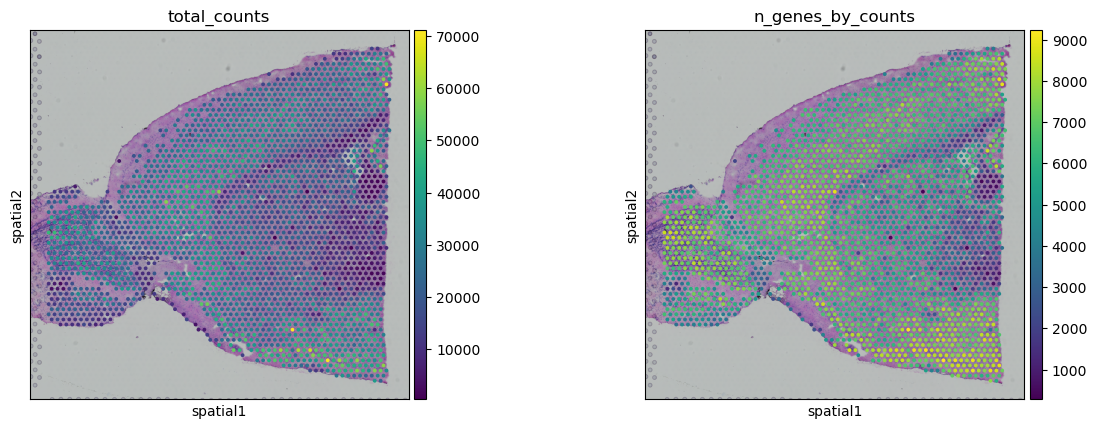

In [8]:
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

In [9]:
adata

AnnData object with n_obs × n_vars = 2487 × 2000
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg'
    obsm: 'spatial'

In [10]:
model = CORE(device="cuda:0")
model.fit(
    n_factors=4,
    data=adata,
    factor_prior="GP",
    weight_prior="SnS",
    covariates_obsm_key="spatial",
    lr=0.005,
    early_stopper_patience=100,
    print_every=100,
    center_groups=True,
    scale_views=False,
    scale_groups=True,
    max_epochs=10000,
    save=True,
    save_path="trained_model",
    init_factors="pca",
    init_scale=0.1,
    gp_n_inducing=1000,
)

Setting up device...
- Running all computations on `cuda:0`
- No likelihoods provided. Inferring likelihoods from data.
  - view_1: Normal
- Centering group_1/view_1...


alt.Chart(...)

Initializing factors using `pca` method...
Decaying learning rate over 10000 iterations.
Setting training seed to `2409161156`.
Cleaning parameter store.
Epoch:       0 | Time:       0.12s | Loss:    2367.80
Epoch:     100 | Time:      12.85s | Loss:    1824.94
Epoch:     200 | Time:      25.20s | Loss:    1491.88
Epoch:     300 | Time:      37.63s | Loss:    1274.23
Epoch:     400 | Time:      50.04s | Loss:    1131.28
Epoch:     500 | Time:      62.37s | Loss:    1048.39
Epoch:     600 | Time:      74.82s | Loss:    1006.08
Epoch:     700 | Time:      87.21s | Loss:     985.15
Epoch:     800 | Time:      99.54s | Loss:     977.30
Epoch:     900 | Time:     112.13s | Loss:     972.58
Epoch:    1000 | Time:     124.48s | Loss:     968.71
Epoch:    1100 | Time:     136.83s | Loss:     968.75
Epoch:    1200 | Time:     149.22s | Loss:     964.37
Training finished after 1276 steps.
Saving results...
`trained_model/model.pkl` already exists, overwriting.
`trained_model/params.save` already

In [13]:
plot_training_curve(model)

alt.Chart(...)

In [14]:
plot_variance_explained(model)

alt.HConcatChart(...)

In [15]:
plot_factor_correlation(model)

alt.HConcatChart(...)

In [16]:
z = model.get_factors()['group_1']
adata.obs = adata.obs.join(z)

In [17]:
plot_factors_covariate_2d(model, "spatial")

alt.VConcatChart(...)

In [18]:
plot_smoothness(model)

alt.HConcatChart(...)

In [19]:
plot_top_weights(model, n_features=40)

alt.HConcatChart(...)

In [32]:
adata

AnnData object with n_obs × n_vars = 2487 × 2000
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'imagerow', 'imagecol'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg'
    obsm: 'spatial'